<a href="https://colab.research.google.com/github/padmapraba/AutoML-Packages/blob/main/GAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gama

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
import logging
import sys
from sklearn.metrics import roc_curve, roc_auc_score
from gama import GamaClassifier


# Breast Cancer Dataset

In [ ]:
# load data and split
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
# set up logging 
gama_log = logging.getLogger('gama')
gama_log.setLevel(logging.INFO)

fh_log = logging.FileHandler('logfile.txt')
fh_log.setLevel(logging.INFO)
gama_log.addHandler(fh_log)

cancer = GamaClassifier(max_total_time=180, verbosity=logging.INFO, store="nothing")
cancer.fit(X_train, y_train)



Using GAMA version 21.0.1.
INIT:GamaClassifier(scoring=neg_log_loss,regularize_length=True,max_pipeline_length=None,random_state=None,max_total_time=180,max_eval_time=None,n_jobs=None,max_memory_mb=None,verbosity=20,search=AsyncEA(),post_processing=BestFitPostProcessing(),output_directory=gama_bb234bde-d208-4c21-8c5a-70af9225423f,store=nothing,goal=simplicity)
START: preprocessing default
STOP: preprocessing default after 0.1849s.
START: search AsyncEA
Starting EA with new population.
Search phase evaluated 290 individuals.
STOP: search AsyncEA after 161.0406s.
START: postprocess BestFitPostProcessing
STOP: postprocess BestFitPostProcessing after 0.1176s.


In [ ]:
pred_label = cancer.predict(X_test)
pred_prob = cancer.predict_proba(X_test)

print('accuracy:', accuracy_score(y_test, pred_label))
print('log loss:', log_loss(y_test, pred_prob))
# the `score` function outputs the score on the metric optimized towards (by default, `log_loss`)
print('log_loss', cancer.score(X_test, y_test))

accuracy: 0.951048951048951
log loss: 0.1597032988451037
log_loss 0.1597032988451037


In [ ]:
# roc
fpr_cancer, tpr_cancer, thresh_cancer = roc_curve(y_test, pred_prob[:,1],pos_label=1)
# auc
auc_score_cancer = roc_auc_score(y_test, pred_prob[:,1])

# Circles

In [ ]:
circles_X, circles_y = make_circles(noise=0.2, random_state=1, factor=0.5)
X_circ_train, X_circ_test, y_circ_train, y_circ_test = train_test_split(circles_X,circles_y,random_state=31)


In [ ]:
circle = GamaClassifier(max_total_time=180, verbosity=logging.INFO, store='nothing')
circle.fit(X_circ_train, y_circ_train)

label_predictions = circle.predict(X_circ_test)
pred_prob = circle.predict_proba(X_circ_test)
# roc & auc
fpr_circ, tpr_circ, thresh_circ = roc_curve(y_circ_test, pred_prob[:,1],pos_label=1)
auc_score_circ = roc_auc_score(y_circ_test, pred_prob[:,1])

print('accuracy:', accuracy_score(y_circ_test, label_predictions))
print('log loss:', log_loss(y_circ_test, pred_prob))
# the `score` function outputs the score on the metric optimized towards (by default, `log_loss`)
print('log_loss', circle.score(X_circ_test, y_circ_test))



Using GAMA version 21.0.1.
INIT:GamaClassifier(scoring=neg_log_loss,regularize_length=True,max_pipeline_length=None,random_state=None,max_total_time=180,max_eval_time=None,n_jobs=None,max_memory_mb=None,verbosity=20,search=AsyncEA(),post_processing=BestFitPostProcessing(),output_directory=gama_2eeba962-5583-40b6-a203-5fde76a54c1c,store=nothing,goal=simplicity)
START: preprocessing default
STOP: preprocessing default after 0.0090s.
START: search AsyncEA
Starting EA with new population.
Search phase evaluated 461 individuals.
STOP: search AsyncEA after 161.0126s.
START: postprocess BestFitPostProcessing
STOP: postprocess BestFitPostProcessing after 0.1241s.
accuracy: 0.8
log loss: 0.44833465940098505
log_loss 0.44833465940098505


# Moons Dataset

In [ ]:
moon_X, moon_y = make_moons(noise=0.3, random_state=0)
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(moon_X,moon_y,random_state=31)

moon = GamaClassifier(max_total_time=180, verbosity=logging.INFO, store='nothing')
moon.fit(X_moon_train, y_moon_train)

label_predictions = moon.predict(X_moon_test)
pred_prob = moon.predict_proba(X_moon_test)

# roc & auc
fpr_moon, tpr_moon, thresh_moon = roc_curve(y_moon_test, pred_prob[:,1],pos_label=1)
auc_score_moon = roc_auc_score(y_moon_test, pred_prob[:,1])

print('accuracy:', accuracy_score(y_moon_test, label_predictions))
print('log loss:', log_loss(y_moon_test, pred_prob))
# the `score` function outputs the score on the metric optimized towards (by default, `log_loss`)
print('log_loss', moon.score(X_moon_test, y_moon_test))

Using GAMA version 21.0.1.
INIT:GamaClassifier(scoring=neg_log_loss,regularize_length=True,max_pipeline_length=None,random_state=None,max_total_time=180,max_eval_time=None,n_jobs=None,max_memory_mb=None,verbosity=20,search=AsyncEA(),post_processing=BestFitPostProcessing(),output_directory=gama_af19a3d0-d880-4717-b70c-8b415462cd71,store=nothing,goal=simplicity)
START: preprocessing default
STOP: preprocessing default after 0.0060s.
START: search AsyncEA
Starting EA with new population.
Search phase evaluated 648 individuals.
STOP: search AsyncEA after 161.0434s.
START: postprocess BestFitPostProcessing
STOP: postprocess BestFitPostProcessing after 0.0461s.
accuracy: 0.88
log loss: 0.31330539023474396
log_loss 0.31330539023474396


# Linearly Separable

In [ ]:
# linearly separable
lin_X, lin_y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)
rng = np.random.RandomState(2)
lin_X += 2 * rng.uniform(size=lin_X.shape)

X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(lin_X,lin_y,random_state=31)

In [ ]:
linear = GamaClassifier(max_total_time=180, verbosity=logging.INFO, store='nothing')
linear.fit(X_lin_train, y_lin_train)

label_predictions = linear.predict(X_lin_test)
pred_prob = linear.predict_proba(X_lin_test)

fpr_lin, tpr_lin, thresh_lin = roc_curve(y_lin_test, pred_prob[:,1],pos_label=1)
auc_score_lin = roc_auc_score(y_lin_test, pred_prob[:,1])

print('accuracy:', accuracy_score(y_lin_test, label_predictions))
print('log loss:', log_loss(y_lin_test, pred_prob))
# the `score` function outputs the score on the metric optimized towards (by default, `log_loss`)
print('log_loss', linear.score(X_lin_test, y_lin_test))

Using GAMA version 21.0.1.
INIT:GamaClassifier(scoring=neg_log_loss,regularize_length=True,max_pipeline_length=None,random_state=None,max_total_time=180,max_eval_time=None,n_jobs=None,max_memory_mb=None,verbosity=20,search=AsyncEA(),post_processing=BestFitPostProcessing(),output_directory=gama_83f27449-2dea-46f1-9c0a-bde4817c0f26,store=nothing,goal=simplicity)
START: preprocessing default
STOP: preprocessing default after 0.0106s.
START: search AsyncEA
Starting EA with new population.
Search phase evaluated 653 individuals.
STOP: search AsyncEA after 161.0568s.
START: postprocess BestFitPostProcessing
STOP: postprocess BestFitPostProcessing after 0.0118s.
accuracy: 1.0
log loss: 0.06632160377093348
log_loss 0.06632160377093348


# ROC Curves


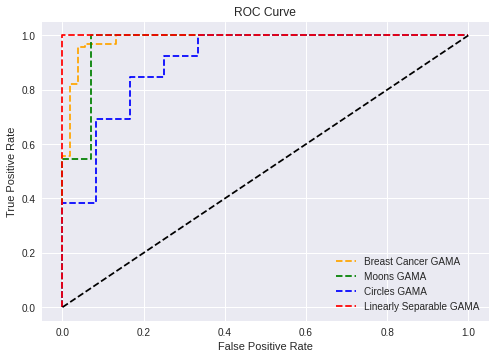

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')



# roc curve for tpr = fpr 
rand_prob= [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, rand_prob,pos_label=1)


# plot roc curves
plt.plot(fpr_cancer, tpr_cancer, linestyle='--', color='orange',label= 'Breast Cancer GAMA')
plt.plot(fpr_moon, tpr_moon, linestyle='--', color='green',label= 'Moons GAMA')
plt.plot(fpr_circ, tpr_circ, linestyle='--', color='blue',label= 'Circles GAMA')
plt.plot(fpr_lin, tpr_lin, linestyle='--', color='red',label= 'Linearly Separable GAMA')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.show()
